## Chơi với bộ số liệu hmeq.csv

### 1. Preprocessing Data
Bước này thực hiện các bước tiền xử lí số liệu và điều tra số liệu như sau: 

1. Kiểm tra mức độ thiếu của dữ liệu, loại dữ liệu. 
2. Thay thế dữ liệu trống trong đó: (1) nếu  là dữ liệu số thì thay NA bằng mean, (2) nếu  là dữ liệu  định tính thì thay NA bằng nhãn có tần suất xuất hiện nhiều nhất. 

In [126]:
# Đặt lại đường dẫn: 
import os
os.chdir("F:/Python_project/data")

In [24]:
# Đọc dữ liệu: 
import pandas as pd
hmeq = pd.read_csv("hmeq.csv")

In [25]:
# Kiểm tra NA ở từng cột biến (chỉ xem 5 quan sát đầu): 
pd.isna(hmeq["BAD"]).head()


0    False
1    False
2    False
3    False
4    False
Name: BAD, dtype: bool

In [26]:
# Số lượng NA của cột biến BAD: 
pd.isna(hmeq["BAD"]).sum()

0

In [27]:
# Kiểm tra NA  cho tất cả các cột biến (hiển thị 5 em đầu tiên): 
hmeq.isna().head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True


In [28]:
# Nếu tách ra một cột biến thì nó là một series: 
type(hmeq["BAD"])

pandas.core.series.Series

In [29]:
# Viết hàm tính NA: 
def so_luong_na (x): 
    a = pd.isna(x).sum()
    return(a)

In [30]:
# Test hàm cho một series: 
so_luong_na(hmeq["BAD"])

0

In [31]:
so_luong_na(hmeq["MORTDUE"])

518

In [32]:
# Sử dụng hàm cho các cột biến của DF: 
hmeq.apply(so_luong_na)

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [33]:
# Viết hàm  tính tỉ lệ % NA: 
def ti_le_na (x): 
    tile = 100*sum(pd.isna(x)) / len(x)
    return(tile)

In [34]:
hmeq.apply(ti_le_na)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [38]:
# Xem kiểu dữ liệu cho từng cột biến: 
hmeq.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [130]:
# Hoặc một cách khác nhiều thông tin hơn: 
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [41]:
# Xem qua 5 quan sát của DF: 
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [43]:
# Số lượng các hồ sơ xấu: 
sum(hmeq["BAD"])

1189

In [46]:
# Hoặc cách khác: 
hmeq["BAD"].mean()


0.199496644295302

In [47]:
# Hoặc cách khác: 
hmeq.mean()

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64

In [61]:
hmeq.mean()

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64

In [63]:
# Thay thế NA bằng mean cho các biến số: 
hmeq_fill_num = hmeq.fillna(hmeq.mean())

In [64]:
# Kiểm tra: 
hmeq_fill_num.apply(ti_le_na)

BAD        0.000000
LOAN       0.000000
MORTDUE    0.000000
VALUE      0.000000
REASON     4.228188
JOB        4.681208
YOJ        0.000000
DEROG      0.000000
DELINQ     0.000000
CLAGE      0.000000
NINQ       0.000000
CLNO       0.000000
DEBTINC    0.000000
dtype: float64

In [66]:
# df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
hmeq["REASON"].value_counts().index[0]


'DebtCon'

In [67]:
hmeq["REASON"].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [68]:
# Với biến định tính thay thế NA bằng nhãn xuất hiện với tần suất lớn nhất (cách 1): 
hmeq_fill_num_cat = hmeq_fill_num.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [69]:
# Kiểm tra: 
hmeq_fill_num_cat.apply(ti_le_na)

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

In [74]:
# Cách 2 (viết một hàm thay NA bằng nhãn có tần suất cao nhất): 
def thay_na_cat (x): 
    y = x.fillna(x.value_counts().index[0])
    return(y) 

In [77]:
# Rồi áp dụng hàm: 
hmeq_fill_cach2 = hmeq_fill_num.apply(thay_na_cat)

In [78]:
# Kiểm tra lại: 
hmeq_fill_cach2.apply(ti_le_na)

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

In [79]:
# Dấu . có ý nghĩa tương tự toán tử pipe: 
hmeq_fill_num.apply(thay_na_cat).apply(ti_le_na)

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

In [82]:
# Dán lại nhãn cho BAD với 1 = B và 0 = G: 
final_df = hmeq_fill_num_cat.assign(BAD = hmeq_fill_num_cat["BAD"].map(lambda x: "B" if x == 1 else "G"))

In [83]:
# Xem dữ liệu: 
final_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,B,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,B,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,B,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,B,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,G,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [85]:
# Tỉ lệ các nhóm hồ sơ: 
final_df["BAD"].value_counts() / len(final_df["BAD"])

G    0.800503
B    0.199497
Name: BAD, dtype: float64

### 2. Gradient Booting Machine 

Dưới đây thực hiện GBM mặc định trong đó 80% dữ liệu được sử dụng để dựng mô hình, 20% còn lại được sử dụng để đánh giá chất lượng của mô hình. Mặt khác để đánh giá chi tiết hơn chất lượng của mô hình cross - validation với k = 5 được sử dụng.

In [86]:
# Load gói h2o: 
import h2o

# Chỉ định 2 nhân của bộ vi xử lí, sử dụng 6 Gi RAM: 
h2o.init(nthreads = 2, max_mem_size = 6)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from C:\Users\win10ls\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\win10ls\AppData\Local\Temp\tmp3a5f3to9
  JVM stdout: C:\Users\win10ls\AppData\Local\Temp\tmp3a5f3to9\h2o_win10ls_started_from_python.out
  JVM stderr: C:\Users\win10ls\AppData\Local\Temp\tmp3a5f3to9\h2o_win10ls_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,07 secs
H2O cluster version:,3.16.0.2
H2O cluster version age:,1 month and 15 days
H2O cluster name:,H2O_from_python_win10ls_4591kx
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [87]:
# Chuyển hóa về object của h2o: 
df = h2o.H2OFrame(final_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [88]:
# Chỉ thị biến Input và Output: 
response = "BAD"
predictors = df.names
predictors.remove("BAD")

In [89]:
# Phân chia dữ liệu: 
train, test = df.split_frame(ratios = [0.8], seed = 29)

#### GBM mặc định

In [90]:
# Thực hiện GBM mặc định đồng thời thực  hiện  cross - validation với k = 5: 
from h2o.estimators.gbm import H2OGradientBoostingEstimator
cv_gbm = H2OGradientBoostingEstimator(nfolds = 5, seed = 29)
cv_gbm.train(x = predictors, y = response, training_frame = train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [91]:
# Đánh giá qua chất lượng của mô hình trên bộ dữ liệu train: 
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.90947354,0.004627987,0.9024145,0.91778004,0.91167194,0.9012474,0.9142539
1,auc,0.9359058,0.0047616195,0.9282244,0.9382064,0.94657916,0.9291058,0.93741345
2,err,0.09052645,0.004627987,0.097585514,0.082219936,0.08832808,0.098752595,0.0857461
3,err_count,86.6,5.667451,97.0,80.0,84.0,95.0,77.0
4,f0point5,0.933622,0.007466399,0.9257485,0.934092,0.9491942,0.91906387,0.9400115
5,f1,0.9441771,0.0028299629,0.94096166,0.9516908,0.94301224,0.9407361,0.9444845
6,f2,0.9552029,0.008132163,0.95668316,0.9699655,0.9369102,0.96345514,0.9490003
7,lift_top_group,1.257673,0.022017712,1.244055,1.2132169,1.2765101,1.2493507,1.3052325
8,logloss,0.24672207,0.007920911,0.26090723,0.22895424,0.24128795,0.24674089,0.25572005
9,max_per_class_error,0.30721962,0.07075259,0.36410257,0.3859649,0.16504854,0.41145834,0.20952381


In [92]:
# Sử dụng dữ liệu test để đánh giá mô hình: 
perf_cv_test = cv_gbm.model_performance(test)

In [93]:
# AUC trên bộ dữ liệu test: 
perf_cv_test.auc()

0.9203554508068589

In [94]:
# Tiêu chuẩn Gini: 
perf_cv_test.gini()

0.8407109016137178

In [95]:
# Ma trận nhầm lẫn: 
perf_cv_test.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38106942749501777: 


,B,G,Error,Rate
B,116.0,99.0,0.4605,(99.0/215.0)
G,13.0,954.0,0.0134,(13.0/967.0)
Total,129.0,1053.0,0.0948,(112.0/1182.0)


In [96]:
# Accuracy khi áp dụng  mô hình trên bộ dữ liệu test: 
1 - 0.0948

0.9052

#### GBM tinh chỉnh

In [97]:
# Thiết lập các tham số cho GBM: 

gbm_turned = H2OGradientBoostingEstimator(
    
  # Số trees càng lớn càng tốt nếu learning rate là đủ nhỏ (nhưng cần  nhiều thời gian tính toán):   
  ntrees = 10000,                                                            

  # leaning rate càng bé càng tốt nhưng mất nhiều  thời gian hơn để tính toán: 
  learn_rate = 0.01,                                                         

  # Dừng sớm thuật toán nếu validation AUC không cải thiện ở ngưỡi ít nhất 0.01% sau 5 lần thực hiện: 
  stopping_rounds = 5, stopping_tolerance = 1e-4, stopping_metric = "AUC", 

  # chọn 80% số cột biến đầu vào cho mỗi cây: 
  sample_rate = 0.8,                                                       

  # chọn 80% số cột  cho mỗi lần phân chia: 
  col_sample_rate = 0.8,
  
  # Cách thức chọn mẫu đảm bảo rằng tỉ lệ các nhãn hồ sơ được bảo toàn: 
  fold_assignment = "Stratified", 
    
  # tái tạo lại kết quả: 
  seed = 1234,                                                             
  score_tree_interval = 10, 
  # thực hiện cross validation với k = 5: 
  nfolds = 5)


In [98]:
# Thực hiện huấn luyện mô hình: 
gbm_turned.train(x = predictors, y = response, training_frame = train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [99]:
# Sử dụng mô hình cho test data: 
perf_for_test = gbm_turned.model_performance(test)

In [100]:
# Ma trận nhầm lẫn: 
perf_for_test.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4260374958554275: 


,B,G,Error,Rate
B,145.0,70.0,0.3256,(70.0/215.0)
G,19.0,948.0,0.0196,(19.0/967.0)
Total,164.0,1018.0,0.0753,(89.0/1182.0)


In [101]:
# Tính AUC: 
perf_for_test.auc()

0.9620499747480821

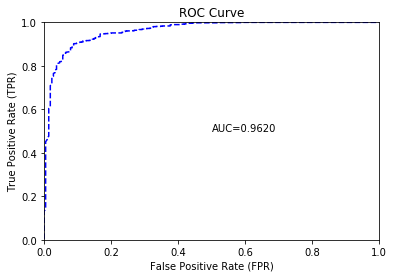

In [102]:
# Hình  ảnh hóa AUC: 
perf_for_test.plot()

In [103]:
#  Tiêu chuẩn Gini: 
perf_for_test.gini()

0.9240999494961641

In [104]:
# Accurracy chung trên mẫu thử nghiệm: 
1 - 0.0753

0.9247

#### Test mô hình  trên 30 mẫu khác nhau

In [124]:
# Lập một vòng lặp để đánh giá chất lượng của mô hình dự báo trên 30 mẫu thử nghiệm. 

BB = []
BG = []
GB = []
GG = []


for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]:
    # Phân chia dữ liệu: 
    train, test = df.split_frame(ratios = [0.5], seed = i)
    perf_for_test = gbm_turned.model_performance(test)
    u = perf_for_test.confusion_matrix()
    v = u.table.as_data_frame()
    BB.append(v.ix[0, "B"])
    BG.append(v.ix[1, "B"])
    GB.append(v.ix[0, "G"])
    GG.append(v.ix[1, "G"])

C:\Users\win10ls\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [106]:
# Chuyển hóa về Series của pandas:     
BB = pd.Series(BB)
BG = pd.Series(BG)
GB = pd.Series(GB)
GG = pd.Series(GG)


# Tạo DF lưu lại kết quả: 
ket_qua = pd.DataFrame({"BB": BB, 
                        "BG": BG,
                        "GB": GB, 
                        "GG": GG}, 
                       columns = ["BB", "BG", "GB", "GG"])
# Xem qua một số kết quả: 
ket_qua.head()

,BB,BG,GB,GG
0,567.0,26.0,29.0,2356.0
1,522.0,22.0,45.0,2388.0
2,526.0,41.0,31.0,2379.0
3,535.0,26.0,42.0,2373.0
4,529.0,26.0,50.0,2372.0


In [107]:
# Các thống kê chủ yếu: 
ket_qua.describe()

,BB,BG,GB,GG
count,30.000000,30.000000,30.000000,30.000000
mean,545.666667,31.233333,39.966667,2359.266667
std,20.266047,8.919886,9.267977,18.573124
min,510.000000,18.000000,26.000000,2313.000000
25%,528.250000,26.000000,31.500000,2347.500000
50%,546.000000,27.500000,41.000000,2361.000000
75%,562.750000,36.750000,46.000000,2372.000000
max,594.000000,58.000000,62.000000,2394.000000


In [108]:
# Tính accuracy trung bình trên 30 lần chạy mô hình: 
Accuracy = (ket_qua["BB"] + ket_qua["GG"]) / (ket_qua["BB"] + ket_qua["GG"] + ket_qua["BG"] + ket_qua["GB"])
Accuracy.describe()

count    30.000000
mean      0.976076
std       0.002876
min       0.964046
25%       0.975223
50%       0.976314
75%       0.977408
max       0.981531
dtype: float64

<IPython.core.display.Javascript object>


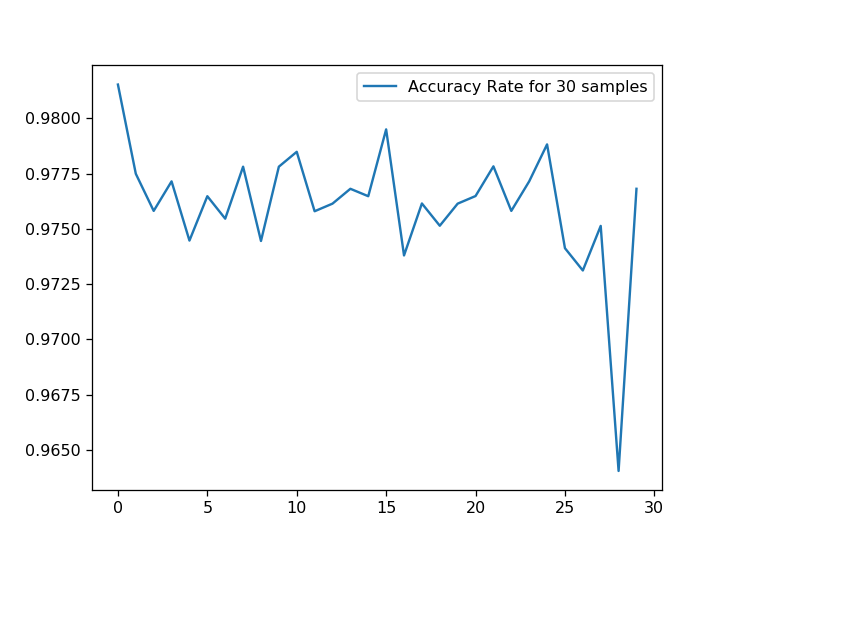

In [131]:
%matplotlib notebook
import matplotlib as plt    
import matplotlib.pyplot as plt

# Vẽ: 
plt.plot(Accuracy, label = "Accuracy Rate for 30 samples")
plt.legend()

### 3. XGBoots (Draft Version)

In [164]:
# XGBoots: 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int8
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null int8
JOB        5960 non-null int8
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(9), int64(1), int8(3)
memory usage: 483.2 KB


In [211]:
for feature in final_df.columns:
    if final_df[feature].dtype == 'object': 
        final_df[feature] = pd.Categorical(final_df[feature]).codes 

In [212]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int8
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null int8
JOB        5960 non-null int8
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(9), int64(1), int8(3)
memory usage: 483.2 KB


In [213]:
final_train = final_df.sample(frac = 0.7, random_state = 200)
final_test = final_df.drop(final_train.index)

In [214]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 2 to 5956
Data columns (total 13 columns):
BAD        1788 non-null int8
LOAN       1788 non-null int64
MORTDUE    1788 non-null float64
VALUE      1788 non-null float64
REASON     1788 non-null int8
JOB        1788 non-null int8
YOJ        1788 non-null float64
DEROG      1788 non-null float64
DELINQ     1788 non-null float64
CLAGE      1788 non-null float64
NINQ       1788 non-null float64
CLNO       1788 non-null float64
DEBTINC    1788 non-null float64
dtypes: float64(9), int64(1), int8(3)
memory usage: 158.9 KB


In [215]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4172 entries, 5722 to 4961
Data columns (total 13 columns):
BAD        4172 non-null int8
LOAN       4172 non-null int64
MORTDUE    4172 non-null float64
VALUE      4172 non-null float64
REASON     4172 non-null int8
JOB        4172 non-null int8
YOJ        4172 non-null float64
DEROG      4172 non-null float64
DELINQ     4172 non-null float64
CLAGE      4172 non-null float64
NINQ       4172 non-null float64
CLNO       4172 non-null float64
DEBTINC    4172 non-null float64
dtypes: float64(9), int64(1), int8(3)
memory usage: 370.8 KB


In [216]:
y_train = final_train.pop('BAD')
y_test = final_test.pop('BAD')

In [217]:
import xgboost as xgb

In [218]:
from sklearn.grid_search import GridSearchCV

In [219]:
cv_params = {'max_depth': [3,5,7], 
             'min_child_weight': [1,3,5]}

ind_params = {'learning_rate': 0.1, 
              'n_estimators': 1000, 
              'seed': 0, 
              'subsample': 0.8, 
              'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params, 
                             scoring = 'accuracy', 
                             cv = 5, 
                             n_jobs = -1) 


In [221]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [179]:
from xgboost import XGBClassifier

In [180]:

GridSearchCV(cv=5, 
             error_score='raise',
             estimator=XGBClassifier(base_score=0.5, 
                                     colsample_bylevel=1, 
                                     colsample_bytree=0.8,
                                     gamma=0, 
                                     learning_rate=0.1, 
                                     max_delta_step=0, 
                                     max_depth=3,
                                     min_child_weight=1, 
                                     missing=None, 
                                     n_estimators=1000, 
                                     nthread=-1,
                                     objective='binary:logistic', 
                                     reg_alpha=0, 
                                     reg_lambda=1,
                                     scale_pos_weight=1,
                                     seed=0, 
                                     silent=True, 
                                     subsample=0.8),
             fit_params={}, 
             iid=True, 
             n_jobs=-1,
             param_grid = {'min_child_weight': [1, 3, 5], 
                           'max_depth': [3, 5, 7]},
             pre_dispatch='2*n_jobs', 
             refit=True, 
             scoring='accuracy', 
             verbose=0)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [181]:
optimized_GBM.grid_scores_

[mean: 0.91826, std: 0.00850, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.91802, std: 0.00909, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.91563, std: 0.00874, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.92929, std: 0.00769, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.92330, std: 0.00732, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.91874, std: 0.00530, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.92641, std: 0.00822, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.92378, std: 0.00659, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.92066, std: 0.00459, params: {'max_depth': 7, 'min_child_weight': 5}]

In [182]:
cv_params = {'learning_rate': [0.1, 0.01], 
             'subsample': [0.7,0.8,0.9]}

ind_params = {'n_estimators': 1000, 
              'seed':0, 
              'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 
              'max_depth': 3, 
              'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', 
                             cv = 5, 
                             n_jobs = -1)

optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [183]:
GridSearchCV(cv=5, 
             error_score='raise',
             estimator = XGBClassifier(base_score=0.5, 
                                       colsample_bylevel=1, 
                                       colsample_bytree=0.8,
                                       gamma=0, 
                                       learning_rate=0.1, 
                                       max_delta_step=0, 
                                       max_depth=3,
                                       min_child_weight=1, 
                                       missing=None, 
                                       n_estimators=1000, 
                                       nthread=-1,
                                       objective='binary:logistic', 
                                       reg_alpha=0, 
                                       reg_lambda=1,
                                       scale_pos_weight=1, 
                                       seed=0, 
                                       silent=True, 
                                       subsample=1),
             fit_params={}, 
             iid=True, 
             n_jobs=-1,
             param_grid={'subsample': [0.7, 0.8, 0.9], 
                         'learning_rate': [0.1, 0.01]},
             pre_dispatch='2*n_jobs', 
             refit=True, 
             scoring='accuracy', 
             verbose=0)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [184]:
optimized_GBM.grid_scores_

[mean: 0.92138, std: 0.00912, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.91826, std: 0.00850, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.91898, std: 0.00872, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.90125, std: 0.00922, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.90149, std: 0.00868, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.90077, std: 0.01025, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [189]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create 

In [190]:


our_params = {'eta': 0.1, 
              'seed':0,
              'subsample': 0.7, 
              'colsample_bytree': 0.7, 
             'objective': 'binary:logistic', 
              'max_depth':3, 
              'min_child_weight':1} 


cv_xgb = xgb.cv(params = our_params,
                dtrain = xgdmat, 
                num_boost_round = 3000, 
                nfold = 5,
                metrics = ['error'], 
                early_stopping_rounds = 100)

In [191]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
769,0.080777,0.014504,0.005573,0.000588
770,0.080777,0.014504,0.005333,0.000398
771,0.080298,0.014431,0.005453,0.000516
772,0.080298,0.014431,0.005393,0.000600
773,0.080058,0.014458,0.005273,0.000617


In [192]:
our_params = {'eta': 0.1,
              'seed':0, 
              'subsample': 0.8, 
              'colsample_bytree': 0.8, 
             'objective': 'binary:logistic',
              'max_depth':3, 
              'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [193]:
%matplotlib inline

In [194]:
importances = final_gb.get_fscore()
importances

{'CLAGE': 380,
 'CLNO': 320,
 'DEBTINC': 319,
 'DELINQ': 123,
 'DEROG': 120,
 'JOB': 108,
 'LOAN': 284,
 'MORTDUE': 374,
 'NINQ': 113,
 'REASON': 31,
 'VALUE': 373,
 'YOJ': 208}

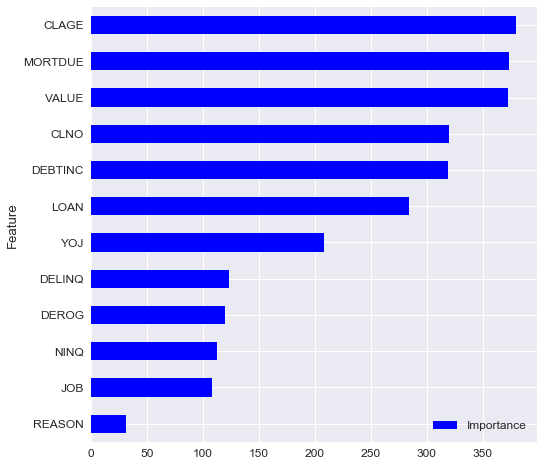

In [206]:
import seaborn as sns
sns.set(font_scale = 1.2)

importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8, 8), color = 'blue')

In [198]:
testdmat = xgb.DMatrix(final_test)

In [199]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) 
y_pred

array([ 0.01208448,  0.11519881,  0.16189577, ...,  0.98975044,
        0.92901266,  0.98955524], dtype=float32)

In [205]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  1.,  1.], dtype=float32)

In [204]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.92058165548098436, 0.079418344519015638)